In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_training(path):
    df = pd.read_csv(path)
    df_loss = df["train_loss"]
    df_loss = df_loss.dropna()
    df_loss.reset_index(drop=True, inplace=True)
    df_loss.head()
    plt.style.use("ggplot")

    df_loss.plot(x=df_loss.index, y="train_loss", figsize=(15, 7), color="b")

    plt.xlabel("time")
    plt.ylabel("loss")
    plt.title("Plot of train_loss over Time")
    average = df_loss.mean()
    min = df_loss.min().round(4)
    max = df_loss.max().round(4)
    moving_average = df_loss.rolling(window=50).mean()
    moving_mean = moving_average.mean().round(4)
    moving_average.plot(label=f"moving average")
    plt.axhline(
        y=moving_mean,
        color="c",
        linestyle="--",
        label=f"Moving average mean = {moving_mean}",
    )
    plt.axhline(y=min, color="g", linestyle="--", label=f"Train min = {min}")
    plt.axhline(y=max, color="y", linestyle="--", label=f"Train max = {max}")
    plt.legend()

    plt.show()

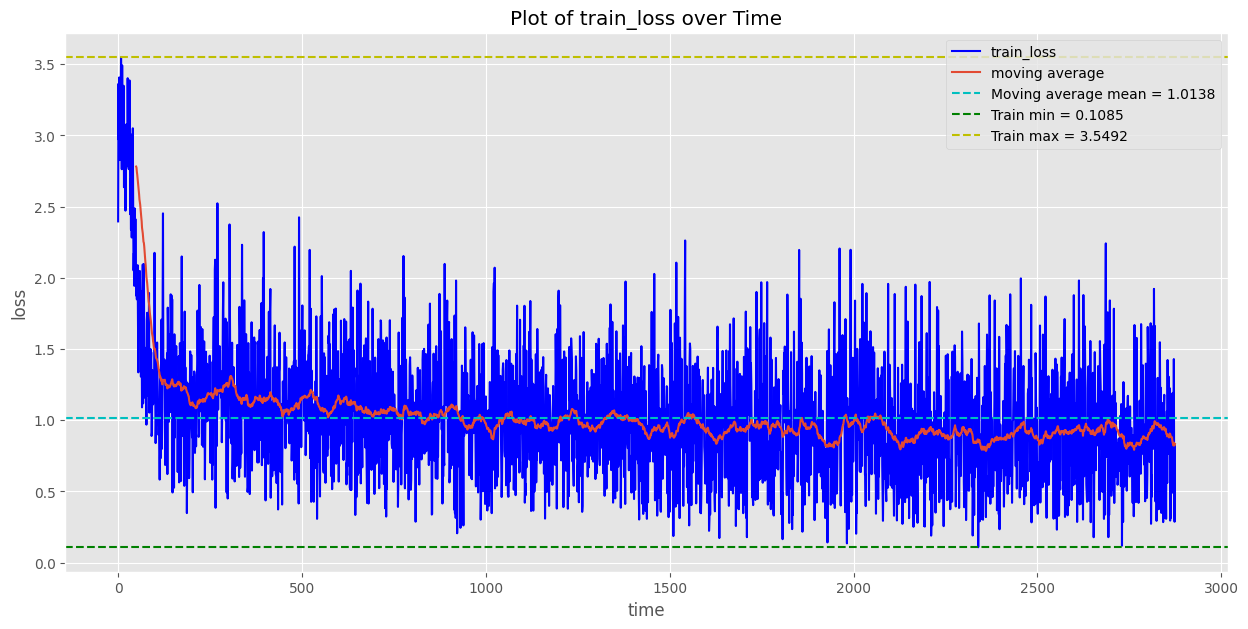

In [5]:
plot_training("../lit-gpt/out/lora/custom/version_10/metrics.csv")